<a href="https://colab.research.google.com/github/CharlyMech/IEDIB_CEIA_2024-25/blob/main/Sistemas%20de%20BigData/Bloque%205/Actividades%20/5.1/CE_5074_5_1_Section_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datashader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 36.4 MB/s eta 0:00:00


In [2]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [3]:
import pandas as pd
# import plotly.express as px
# from dash import Dash, dcc, html, Input, Output
df = pd.read_csv('https://raw.githubusercontent.com/tnavarrete-iedib/bigdata-24-25/refs/heads/main/naixements.csv', sep=';')
df.head()

,Nacional y Comunidades autónomas,Edad de la madre,Orden del nacido vivo,Periodo,Total
0,Total Nacional,Todas las edades,Todos,2023,320.656
1,Total Nacional,Todas las edades,Todos,2022,329.251
2,Total Nacional,Todas las edades,Todos,2021,337.380
3,Total Nacional,Todas las edades,Todos,2020,341.315
4,Total Nacional,Todas las edades,Todos,2019,360.617


In [4]:
# Categorization methods
def categorize_by_age(age):
  if age == 'Todas las edades':
    return None # skip the 'Todas las edades' rows
  elif age in ['Menos de 15 años', '15 años', '16 años', '17 años', '18 años', '19 años']:
    return 'up_to_19'
  elif age in ['20 años', '21 años', '22 años', '23 años', '24 años', '25 años', '26 años', '27 años', '28 años', '29 años']:
    return 'from_20_to_29'
  elif age in ['30 años', '31 años', '32 años', '33 años', '34 años', '35 años', '36 años', '37 años', '38 años', '39 años']:
    return 'from_30_to_39'
  elif age in ['40 años', '41 años', '42 años', '43 años', '44 años', '45 años', '46 años', '47 años', '48 años', '49 años']:
    return 'from_40_to_49'
  else:
    return 'more_than_50'

def categorize_by_child_order(order):
  if order=='Primero' or order=='Todos':
    return '1st'
  elif order=='Segundo':
    return '2nd'
  else:
    return '3rd_more'


# 1 - Pie chart with Matplotlib - 2023 group by mother age range

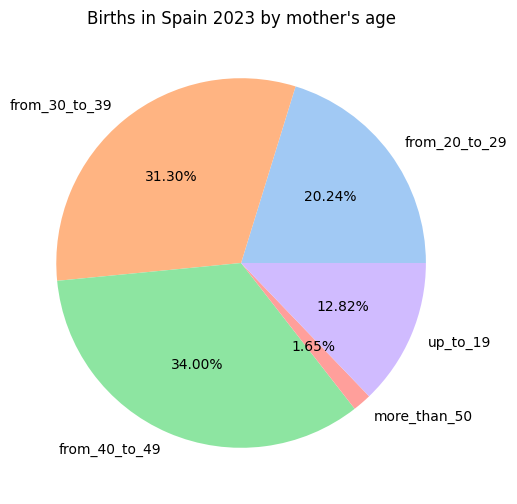

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

df_2023 = df[(df['Periodo'] == 2023) & (df['Nacional y Comunidades autónomas'] == 'Total Nacional') & (df['Edad de la madre'].notna()) & (df['Edad de la madre'] != 'Todas las edades')].copy()
df_2023['Age group'] = df_2023['Edad de la madre'].apply(categorize_by_age)
filtered_data = df_2023.groupby('Age group')['Total'].sum().reset_index() # Group&Filter data and sum 'Total' values
'''
  I decided to use the data that has 'Nacional y Comunidades autónomas' as 'Total nacional'
  and 'Edad de la madre' is not 'Todas las edades', since the resulting data frame has the
  compressed data we're looking for
'''

plt.figure(figsize=(12, 6))
color_palette = sns.color_palette('pastel', len(filtered_data))
plt.title('Births in Spain 2023 by mother\'s age')
plt.pie(filtered_data['Total'], labels=filtered_data['Age group'], autopct='%1.2f%%', colors=color_palette)
plt.show()